In [2]:
!pip install matplotlib seaborn pandas

25/12/07 22:35:10 WARN Utils: Your hostname, MacPro6, resolves to a loopback address: 127.0.1.1; using 192.168.1.224 instead (on interface wlp13s0)
25/12/07 22:35:10 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
25/12/07 22:35:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


--- Résumé calculé par Spark ---


+-----------+-----+
|    Produit|count|
+-----------+-----+
|    AirPods|    4|
|     iPhone|    3|
|MacBook Pro|    2|
|       iPad|    2|
+-----------+-----+



/tmp/ipykernel_28663/3357305323.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Produit', y='count', data=pdf, palette='viridis')


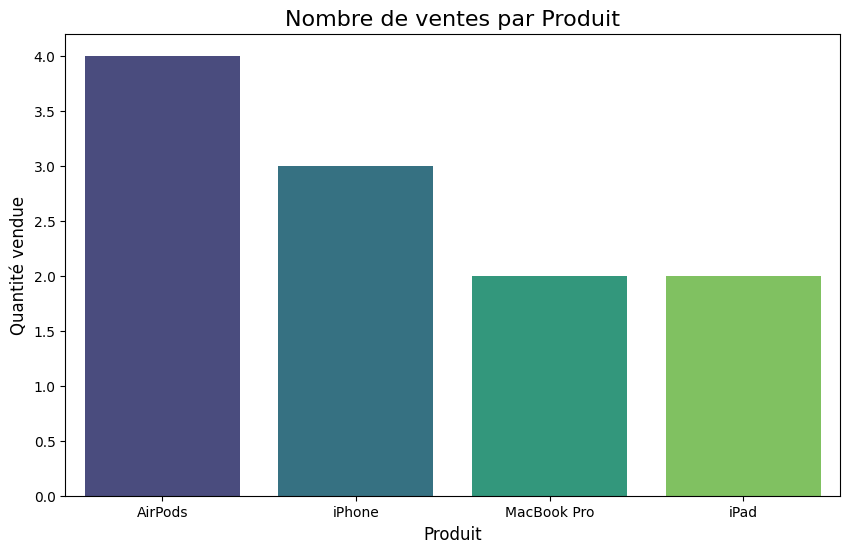

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# 1. Démarrer Spark (si ce n'est pas déjà fait)
spark = SparkSession.builder.appName("VizualisationSpark").getOrCreate()

# 2. Création de données factices (Ventes de produits)
data = [
    ("MacBook Pro", 2000), ("MacBook Pro", 2000), ("iPhone", 1000),
    ("iPhone", 1000), ("iPhone", 1000), ("AirPods", 200),
    ("AirPods", 200), ("AirPods", 200), ("AirPods", 200),
    ("iPad", 800), ("iPad", 800)
]
df = spark.createDataFrame(data, ["Produit", "Prix"])

# 3. LE TRAVAIL DE SPARK (L'Agrégation)
# On demande à Spark de compter combien de fois chaque produit a été vendu
# C'est ici que la puissance de calcul est utilisée
df_agg = df.groupBy("Produit").count().orderBy(col("count").desc())

print("--- Résumé calculé par Spark ---")
df_agg.show()

# 4. LE PONT (La Conversion vers Pandas)
# On ramène le résultat (qui est petit : 4 lignes) vers la mémoire locale pour le dessin
pdf = df_agg.toPandas()

# 5. LE DESSIN (Avec Seaborn/Matplotlib)
plt.figure(figsize=(10, 6)) # Taille de l'image

# Création du barplot
sns.barplot(x='Produit', y='count', data=pdf, palette='viridis')

# Esthétique
plt.title('Nombre de ventes par Produit', fontsize=16)
plt.xlabel('Produit', fontsize=12)
plt.ylabel('Quantité vendue', fontsize=12)

# Afficher
plt.show()

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum
from datetime import date

# 1. Initialisation (Si nécessaire, sinon ignorez cette ligne)
# spark = SparkSession.builder.appName("CourbeTemporelle").getOrCreate()

# 2. Création de données temporelles (Date, Chiffre d'Affaires)
# Imaginons une semaine de ventes
donnees_temps = [
    (date(2023, 1, 1), 150),
    (date(2023, 1, 2), 200),
    (date(2023, 1, 3), 180), # Légère baisse
    (date(2023, 1, 4), 320), # Gros pic
    (date(2023, 1, 5), 300),
    (date(2023, 1, 6), 400),
    (date(2023, 1, 7), 450)
]

df_temps = spark.createDataFrame(donnees_temps, ["Date", "Ventes"])

# 3. SPARK : Agrégation et TRI
# Même si nos données semblent triées, en Big Data, l'ordre n'est jamais garanti.
# Il faut TOUJOURS forcer le tri avec .orderBy() avant de dessiner.
df_tendance = df_temps.groupBy("Date").agg(sum("Ventes").alias("Total_Ventes")) \
                      .orderBy("Date") # <--- L'étape cruciale pour une courbe

print("--- Données prêtes pour le dessin ---")
df_tendance.show()

# 4. Conversion vers Pandas
pdf_tendance = df_tendance.toPandas()

# 5. DESSIN (Line Plot)
plt.figure(figsize=(10, 6))

# On utilise 'plot' standard pour une courbe (marker='o' ajoute des points)
plt.plot(pdf_tendance['Date'], pdf_tendance['Total_Ventes'], marker='o', linestyle='-', color='b')

# Esthétique
plt.title('Évolution du Chiffre d\'Affaires sur la semaine', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ventes (€)', fontsize=12)
plt.grid(True) # Ajoute une grille pour faciliter la lecture

# Rotation des dates en bas pour qu'elles soient lisibles
plt.gcf().autofmt_xdate()

plt.show()

NameError: name 'spark' is not defined